<a href="https://colab.research.google.com/github/anil-mannem/INFO-5731-Spring-2024/blob/main/Mannem_Anil_INFO5731_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,641 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Get:13 https://developer.download.nvidia.com/comp

In [2]:
import nltk
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup as bs
import requests
import urllib.request

options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [3]:
from bs4 import BeautifulSoup as bs
import requests
import urllib.request


HEADERS = ({'User-Agent':
           'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
                           'Accept-Language': 'en-US, en;q=0.5'})

def getNames(soup):
  names = []
  names= soup.find_all('span',class_='a-profile-name')
  for i in range(2,len(names)):
      names.append(names[i].get_text())
  return names

def getTitle(soup):
  titles = []
  title = soup.find_all('a',class_='review-title-content')
  for i in range(0,len(title)):
    titles.append(title[i].get_text())
  titles[:] = [titles.lstrip('\n') for titles in titles]
  titles[:] = [titles.rstrip('\n') for titles in titles]
  return titles

def getRating(soup):
  ratings = []
  rating = soup.find_all('i',class_='review-rating')
  for i in range(2,len(rating)):
    ratings.append(rating[i].get_text())
  return ratings

def getReview_text(soup):
  texts = []
  review_text= soup.find_all('span',class_='review-text-content')
  for i in range(0,len(review_text)):
    texts.append(review_text[i].get_text())
    texts[:] = [reviews.lstrip('\n') for reviews in texts]
    texts[:] = [reviews.rstrip('\n') for reviews in texts]
  return texts

def getReviewDate(soup):
  dates = []
  review_date = soup.find_all('span',class_='review-date')
  for i in range(2,len(review_date)):
    dates.append(review_date[i].get_text())
  return dates

def scrape():
  user_name=[]
  review_title=[]
  ratings=[]
  review_text=[]
  review_dates=[]
  for number in range(1,18):
    link= 'https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+ str(number) # By attaching the str(number) at the end the link generates dynamically
    print(link)
    webpage = requests.get(link, headers=HEADERS)
    soup = bs(webpage.content,'html.parser')

    nameList = getNames(soup)
    user_name.extend(nameList)

    titleList = getTitle(soup)
    review_title.extend(titleList)

    ratingsList = getRating(soup)
    ratings.extend(ratingsList)

    reviewtextList = getReview_text(soup)
    review_text.extend(reviewtextList)

    datesList = getReviewDate(soup)
    review_dates.extend(datesList)

  print(len(user_name))
  print(len(review_title))
  print(len(ratings))
  print(len(review_text))
  print(len(review_dates))
  return (user_name, review_title, ratings, review_text, review_dates)


In [4]:
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


def lowerCase(reviews_list):
  return reviews_list.apply(lambda x: " ".join(x.lower() for x in x.split()))


def removePunctuation(reviews_list):
  return reviews_list.str.replace('[^\w\s]','')


def removeSpecialCharcters(reviews_list):
  return reviews_list.apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


def removeStopWords(reviews_list):
  stop = stopwords.words('english')
  return reviews_list.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def correctSpelling(reviews_list):
  return reviews_list.apply(lambda x: str(TextBlob(x).correct()))

def Tokenisation(reviews_list):
  return reviews_list.apply(lambda x: TextBlob(x).words)

def stemming(reviews_list):
  ps = PorterStemmer()
  return reviews_list.apply(lambda x: " ".join([ps.stem(word) for word in x]))

def lemmitization(reviews_list):
  return reviews_list.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
detailTuple = scrape()

https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Apple-iPhone-11-6

In [6]:
userNameList = detailTuple[0]
review_titleList = detailTuple[1]
ratings_list = detailTuple[2]
review_text_list = detailTuple[3]
review_dates_list = detailTuple[4]

In [7]:
import pandas as pd
df=pd.DataFrame()
df['User Name']=userNameList[0:len(review_titleList)]     # Appending the list to the df column
df['Review Title']=review_titleList
df['Review Text']=review_text_list
df['Star']=ratings_list
df['Review posted time']=review_dates_list
print(df.head(150))
df.to_csv("/content/sample_data/AmazonReviews.csv")

           User Name                                       Review Title  \
0        [S. Fiacco]     5.0 out of 5 stars\niphone 11 is pretty great!   
1           [Shavon]  5.0 out of 5 stars\nApple iPhone 11 Review: A ...   
2        [S. Fiacco]  5.0 out of 5 stars\nPriced well, shipped quick...   
3             [Ms D]  4.0 out of 5 stars\nPhone is great! Shipping &...   
4  [Amazon Customer]            5.0 out of 5 stars\nExtremely satisfied   
5  [Amazon Customer]       5.0 out of 5 stars\nPhone in great condition   
6        [TreeSaw R]              5.0 out of 5 stars\nGREAT CONDITION !   
7         [firktwee]  4.0 out of 5 stars\nYou get more than you pay for   
8           [mary m]                   5.0 out of 5 stars\nAs Described   
9         [R. Brown]              4.0 out of 5 stars\nAmazing Purchase!   

                                         Review Text                Star  \
0  I know from experience what the phones are lik...  5.0 out of 5 stars   
1  Update:  I'm back w

In [8]:
review_df = df[['Review Title','Review Text']]

reviewtextList = df['Review Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = correctSpelling(reviewtextList)
reviewtextList = Tokenisation(reviewtextList)
reviewtextList = stemming(reviewtextList)
reviewtextList = lemmitization(reviewtextList)

In [9]:
review_df['Preprocessed_Review_Text'] = reviewtextList
review_df

<ipython-input-9-9a23d3263854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Preprocessed_Review_Text'] = reviewtextList


,Review Title,Review Text,Preprocessed_Review_Text
0,5.0 out of 5 stars\niphone 11 is pretty great!,I know from experience what the phones are lik...,know experi phone like amazon son purchas phon...
1,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,Update: I'm back with an update on our journe...,updat back updat journey phone 11 let tell qui...
2,"5.0 out of 5 stars\nPriced well, shipped quick...",This refurbed iPhone 11 (seller: Macalegin Ele...,return phone 11 seller macalegin electron arri...
3,4.0 out of 5 stars\nPhone is great! Shipping &...,The renewed iPhone 11 itself is in great condi...,renew phone 11 great condit batteri health 91 ...
4,5.0 out of 5 stars\nExtremely satisfied,I almost backed out after reading the reviews ...,almost back read review think decid order glad...
5,5.0 out of 5 stars\nPhone in great condition,The phone came in a box that kept it safe. The...,phone came box kept safe phone work great pret...
6,5.0 out of 5 stars\nGREAT CONDITION !,Received the phone yesterday and it’s in excel...,receiv phone yesterday excel condit phone took...
7,4.0 out of 5 stars\nYou get more than you pay for,I purchased this phone as a majorly needed upg...,purchas phone major need upgrad previou oner w...
8,5.0 out of 5 stars\nAs Described,The iPhone I purchased from this seller exceed...,phone purchas seller exceed expect renew phone...
9,4.0 out of 5 stars\nAmazing Purchase!,This was an amazing purchase! I opened the box...,amaz purchas open box took wrap now scratch me...


In [10]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

In [11]:
wordTokenarray= []
for i in review_df['Preprocessed_Review_Text']:
  wordTokenarray.append(word_tokenize(i))

In [12]:
cleaned_data = [x for x in wordTokenarray if x != []]
repeat_list = list(itertools.chain.from_iterable(cleaned_data))

trigrams = nltk.trigrams(repeat_list)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('face', 'id', 'work'): 2, ('need', 'quick', 'replac'): 2, ('appl', 'phone', '11'): 2, ('face', 'id', 'set'): 2, ('came', 'screen', 'protector'): 2, ('deliv', 'day', 'earli'): 2, ('screen', 'protector', 'alreadi'): 2, ('know', 'experi', 'phone'): 1, ('experi', 'phone', 'like'): 1, ('phone', 'like', 'amazon'): 1, ...})

In [13]:
from collections import Counter
bg = nltk.bigrams(repeat_list)
FD = nltk.FreqDist(bg)
bg_dict = dict(FD)
for i in bg_dict:
  print( str(i) + ':' + str(bg_dict[i] / repeat_list.count(i[0])))

('know', 'experi'):1.0
('experi', 'phone'):0.25
('phone', 'like'):0.02
('like', 'amazon'):0.07142857142857142
('amazon', 'son'):0.25
('son', 'purchas'):1.0
('purchas', 'phone'):0.3333333333333333
('phone', 'alway'):0.02
('alway', 'good'):0.5
('good', 'experi'):0.16666666666666666
('experi', 'ensur'):0.25
('ensur', 'purchas'):0.5
('phone', 'work'):0.08
('work', 'like'):0.2222222222222222
('like', 'charm'):0.07142857142857142
('charm', 'think'):1.0
('think', 'one'):0.5
('one', 'small'):0.1111111111111111
('small', 'scratch'):0.5
('scratch', 'care'):0.2
('care', 'especi'):0.3333333333333333
('especi', 'cover'):0.25
('cover', 'case'):1.0
('case', '24'):0.5
('24', '7'):1.0
('7', 'notic'):1.0
('notic', 'unless'):0.25
('unless', 'u'):1.0
('u', 'realli'):0.5
('realli', 'look'):0.5
('look', 'charg'):0.5
('charg', 'pretti'):0.09090909090909091
('pretti', 'fast'):0.5
('fast', 'also'):0.2
('also', 'depend'):0.3333333333333333
('depend', 'good'):0.3333333333333333
('good', 'charg'):0.16666666666666

In [14]:
complete_data = ''
j= []
count = 1
for i in review_df['Preprocessed_Review_Text']:
  complete_data = complete_data + i
  k = 'Review-' + str(i)
  j.append(k)
  count+= 1

In [15]:
from textblob import TextBlob
import nltk
nltk.download('brown')

np = []
fcy = []
for i in review_df['Preprocessed_Review_Text']:
  blob = TextBlob(i)
  for nouns in blob.noun_phrases:
    np.append(nouns)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [16]:
for w in np:
  npf = []
  for i in review_df['Preprocessed_Review_Text']:
    npf.append(i.count(w) / complete_data.count(w))
  fcy.append(np)
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

<ipython-input-16-a9a8b3cfbd8b>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  noun_phrases_Data.j = j


,experi phone,amazon son purchas phone alway good experi ensur purchas phone work,small scratch care especi,u realli look charg pretti,good charg camera qualiti,normal purchas appl product appl care,time decid,appl appl price,mind u fix,screen lead phone work,...,new label use camera,great dual camera,great ultra,wide view,main view batteri capac,intern batteri charg,percent problem intern batteri,limit phone use charg,hi use charg,great phone excit use year
0,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,...,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone,experi phone
1,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...,amazon son purchas phone alway good experi ens...
2,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,...,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi,small scratch care especi
3,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,...,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti,u realli look charg pretti
4,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,...,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti,good charg camera qualiti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,...,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg,intern batteri charg
168,percent problem intern batteri,percent problem intern batteri,percent problem intern batteri,percent problem intern batteri,percent problem intern 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [17]:
# Write your code here
reviewtextList = df['Review Text']
reviewtextList = lowerCase(reviewtextList)
reviewtextList = removePunctuation(reviewtextList)
reviewtextList = removeSpecialCharcters(reviewtextList)
reviewtextList = removeStopWords(reviewtextList)
reviewtextList = correctSpelling(reviewtextList)

In [18]:
review_df['After Spelling Correction'] = reviewtextList

<ipython-input-18-c75fa881cfbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['After Spelling Correction'] = reviewtextList


In [19]:
review_df

,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction
0,5.0 out of 5 stars\niphone 11 is pretty great!,I know from experience what the phones are lik...,know experi phone like amazon son purchas phon...,know experience phone like amazon son purchase...
1,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,Update: I'm back with an update on our journe...,updat back updat journey phone 11 let tell qui...,update back update journey phone 11 let tell q...
2,"5.0 out of 5 stars\nPriced well, shipped quick...",This refurbed iPhone 11 (seller: Macalegin Ele...,return phone 11 seller macalegin electron arri...,returned phone 11 seller macalegin electronics...
3,4.0 out of 5 stars\nPhone is great! Shipping &...,The renewed iPhone 11 itself is in great condi...,renew phone 11 great condit batteri health 91 ...,renewed phone 11 great condition battery healt...
4,5.0 out of 5 stars\nExtremely satisfied,I almost backed out after reading the reviews ...,almost back read review think decid order glad...,almost backed reading reviews thinking decided...
5,5.0 out of 5 stars\nPhone in great condition,The phone came in a box that kept it safe. The...,phone came box kept safe phone work great pret...,phone came box kept safe phone works great pre...
6,5.0 out of 5 stars\nGREAT CONDITION !,Received the phone yesterday and it’s in excel...,receiv phone yesterday excel condit phone took...,received phone yesterday excellent condition p...
7,4.0 out of 5 stars\nYou get more than you pay for,I purchased this phone as a majorly needed upg...,purchas phone major need upgrad previou oner w...,purchased phone majority needed upgrade previo...
8,5.0 out of 5 stars\nAs Described,The iPhone I purchased from this seller exceed...,phone purchas seller exceed expect renew phone...,phone purchased seller exceeded expectations r...
9,4.0 out of 5 stars\nAmazing Purchase!,This was an amazing purchase! I opened the box...,amaz purchas open box took wrap now scratch me...,amazing purchase opened box took wrap now scra...


In [20]:
review_df.to_csv('/content/sample_data/AmazonReviews.csv')

In [21]:
import math
sentences = review_df["After Spelling Correction"].values.tolist()
words = set([j for i in sentences for j in i.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count=1

In [22]:
def tf_idf(x,sentence):
  value = sentence.count(x)
  size = len(sentence.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0

In [23]:
for sentence in sentences:
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
  count=count+1
tf_idf_df

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,Review10
0,64gb,0.000000,0.007651,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,prove,0.000000,0.007651,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,attempts,0.000000,0.007651,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,going,0.000000,0.000000,0.0,0.009918,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,efficient,0.000000,0.013472,0.0,0.000000,0.050428,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
561,blemishes,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.051684,0.000000
562,run,0.000000,0.000000,0.0,0.009918,0.000000,0.0,0.0,0.021346,0.000000,0.000000
563,city,0.000000,0.000000,0.0,0.009918,0.000000,0.0,0.0,0.000000,0.000000,0.028561
564,future,0.017327,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

search_sentence="An Outstanding movie with a haunting performance and best character development"
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector:
      if j in X_set: list1.append(1)
      else: list1.append(0)
      if j in Y_set: list2.append(1)
      else: list2.append(0)
  return r_vector, list1, list2

In [25]:
def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)):
        count+= list1[i]*list2[i]
  c = count / float((sum(list1)*sum(list2))**0.5)
  return c

In [26]:
list3 = []
for l in review_df['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(review_df['Review Text'],list3)), columns=['Review Text','cosine cimilarity'])
Data2

,Review Text,cosine cimilarity
0,I know from experience what the phones are lik...,0.000000
1,Update: I'm back with an update on our journe...,0.023212
2,This refurbed iPhone 11 (seller: Macalegin Ele...,0.000000
3,The renewed iPhone 11 itself is in great condi...,0.000000
4,I almost backed out after reading the reviews ...,0.000000
5,The phone came in a box that kept it safe. The...,0.000000
6,Received the phone yesterday and it’s in excel...,0.059761
7,I purchased this phone as a majorly needed upg...,0.000000
8,The iPhone I purchased from this seller exceed...,0.000000
9,This was an amazing purchase! I opened the box...,0.000000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [27]:
# Write your code here
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

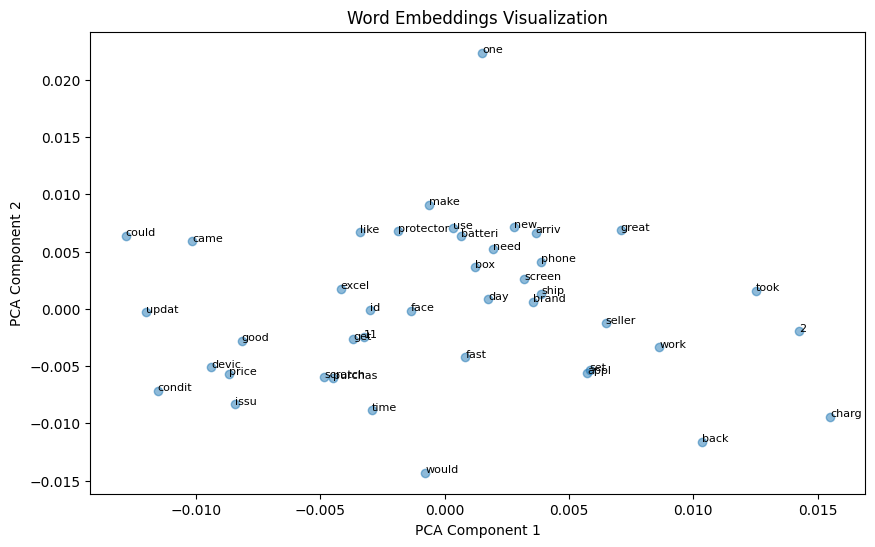

In [28]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define training data
sentences = []
for text in review_df['Preprocessed_Review_Text']:
    tokens = text.split()
    sentences.append(tokens)

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
words = model.wv.index_to_key  # Accessing the words in the vocabulary
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Word Embeddings Visualization')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [29]:
!pip install transformers

In [30]:
from transformers import pipeline

In [31]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [32]:
def converttovalues(sentilist):
  label = ''
  score = ''
  for sentidict in sentilist:
    label = sentidict['label']
    score = sentidict['score']
  return label, score

def splitText(combinedString):
  return ' '.join((combinedString.split())[:210])

def isFileExists(csvFile):
  return path.exists('/content/gdrive/MyDrive/SoftwareAdviceSentiment/'+csvFile)

def calucalteSentiscores(combinedStringList):
  sentiment_score = []
  sentiment_label = []
  for combinedString in combinedStringList:
    updatedString = splitText(combinedString)
    senti = classifier(updatedString)
    label,senti = converttovalues(senti)
    sentiment_score.append(senti)
    sentiment_label.append(label)
  return sentiment_score, sentiment_label

In [33]:
prepreocessList = review_df['Preprocessed_Review_Text']
responseTuple = calucalteSentiscores(prepreocessList)

In [34]:
len(prepreocessList)

10

In [35]:
review_df['Sentiment_score'] = responseTuple[0]
review_df['Sentiment_'] = responseTuple[1]

In [36]:
review_df

,Review Title,Review Text,Preprocessed_Review_Text,After Spelling Correction,Sentiment_score,Sentiment_
0,5.0 out of 5 stars\niphone 11 is pretty great!,I know from experience what the phones are lik...,know experi phone like amazon son purchas phon...,know experience phone like amazon son purchase...,0.996015,NEGATIVE
1,5.0 out of 5 stars\nApple iPhone 11 Review: A ...,Update: I'm back with an update on our journe...,updat back updat journey phone 11 let tell qui...,update back update journey phone 11 let tell q...,0.998391,NEGATIVE
2,"5.0 out of 5 stars\nPriced well, shipped quick...",This refurbed iPhone 11 (seller: Macalegin Ele...,return phone 11 seller macalegin electron arri...,returned phone 11 seller macalegin electronics...,0.665329,POSITIVE
3,4.0 out of 5 stars\nPhone is great! Shipping &...,The renewed iPhone 11 itself is in great condi...,renew phone 11 great condit batteri health 91 ...,renewed phone 11 great condition battery healt...,0.996810,NEGATIVE
4,5.0 out of 5 stars\nExtremely satisfied,I almost backed out after reading the reviews ...,almost back read review think decid order glad...,almost backed reading reviews thinking decided...,0.994816,NEGATIVE
5,5.0 out of 5 stars\nPhone in great condition,The phone came in a box that kept it safe. The...,phone came box kept safe phone work great pret...,phone came box kept safe phone works great pre...,0.987115,NEGATIVE
6,5.0 out of 5 stars\nGREAT CONDITION !,Received the phone yesterday and it’s in excel...,receiv phone yesterday excel condit phone took...,received phone yesterday excellent condition p...,0.988524,NEGATIVE
7,4.0 out of 5 stars\nYou get more than you pay for,I purchased this phone as a majorly needed upg...,purchas phone major need upgrad previou oner w...,purchased phone majority needed upgrade previo...,0.990860,NEGATIVE
8,5.0 out of 5 stars\nAs Described,The iPhone I purchased from this seller exceed...,phone purchas seller exceed expect renew phone...,phone purchased seller exceeded expectations r...,0.998091,NEGATIVE
9,4.0 out of 5 stars\nAmazing Purchase!,This was an amazing purchase! I opened the box...,amaz purchas open box took wrap now scratch me...,amazing purchase opened box took wrap now scra...,0.995294,NEGATIVE


In [37]:
review_df.to_csv('/content/sample_data/Sentiment_reviews.csv')

In [38]:
# The GitHub link of your final csv file


# Link:
# Reviews file: https://github.com/anil-mannem/INFO-5731-Spring-2024/blob/main/AmazonReviews.csv

# Sentiment Analysis File: https://github.com/anil-mannem/INFO-5731-Spring-2024/blob/main/Sentiment_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [39]:
# Type your answer
I thought about this assignment and found it to be both challenging and satisfying.
The implementation of TF-IDF and cosine similarity from scratch required a deep understanding of the underlying mathematical concepts and knew how to utilize them in Python without the aid of pre-built libraries, which made it extremely challenging. It was difficult but rewarding to build my foundation in text processing and vector space models thanks to this function.
One of the difficult parts was making sure the TF-IDF calculation was accurate and that it was applied appropriately to the document similarity calculations. Specifically, I had to thoroughly go through each step of the process, from vector alignment to preprocessing, in order to troubleshoot zero similarity scores.
It highlighted the need of being meticulous while preparing data and putting algorithms into practice—two things that are fundamental to data science. Positively, developing these algorithms by hand provided me a thorough understanding of how they work behind the scenes, which was a really valuable experience. It was good to watch the algorithms come to life and provide valuable results, such as the appearance of non-zero cosine similarity ratings. By making text analysis and similarity calculation processes more understandable, it improved the learning experience. The time allocated for the task seemed to be just right.
Efficacious problem-solving strategies and focused effort were required due to time limits, even with the intricate goals.
My ability to code and perform under pressure both increased as a result of being inspired to use what I had learnt in a concentrated manner. When everything was said and done, this assignment was a valuable learning opportunity. Along with increasing my technical expertise in natural language processing (NLP), it also helped me become more adept at solving problems.
Because the work balanced effort and fun, it was incredibly rewarding and engaging.